## Importing Required Libraries

In [53]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns

## Importing the loan_csv file and creating a dataframe.|

In [54]:
loan=pd.read_csv('loan.csv',low_memory=False)

In [55]:
loan_df=loan

In [56]:
# Inspect the data loaded
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [57]:
loan_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

#### Removing all colums having only null values

In [58]:
empty_cols=loan_df.columns[loan_df.isnull().all()]

In [59]:
loan_df.drop(columns=empty_cols,inplace=True)

In [60]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [61]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### INSIGHTS
- There are 53 columns which are 100 % empty
 And 3 columns which have more than 60 % empty
 Are dropped

### DROP COLUMNS
1. This columns are empty
- next_pymnt_d     97.12 %
- mths_since_last_delinq        64.66 %
- mths_since_last_record        92.98 %
2.THis columns are not relevant to the analysis
- url
- policy_code
- application_type
- zip_code
- addr_state
- tax_liens
- delinq_amnt
- chargeoff_within_12_mths
- acc_now_delinq
- collections_12_mths_ex_med

In [62]:
cols_not_required =['url','next_pymnt_d','mths_since_last_delinq','mths_since_last_record','policy_code','application_type',
     'zip_code','addr_state','tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq',
     'collections_12_mths_ex_med']

In [63]:
loan_df.drop(columns=cols_not_required ,inplace=True)

In [64]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [65]:
columns_to_keep = [ 'id',''
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv','term', 'int_rate', 'installment',
    'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
    'verification_status','issue_d', 'purpose', 'loan_status', 'dti', 
]

# Keep only the specified columns in the dataframe
loan_df = loan_df[columns_to_keep]

## Considered only fully paid loan and charged off for analysis purpose

In [66]:
loan_df=loan_df[~(loan_df['loan_status']=='Current')]

In [67]:
loan_df.shape

(38577, 17)

In [68]:
loan_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38577 non-null  int64  
 1   loan_amnt            38577 non-null  int64  
 2   funded_amnt          38577 non-null  int64  
 3   funded_amnt_inv      38577 non-null  float64
 4   term                 38577 non-null  object 
 5   int_rate             38577 non-null  object 
 6   installment          38577 non-null  float64
 7   grade                38577 non-null  object 
 8   sub_grade            38577 non-null  object 
 9   emp_length           37544 non-null  object 
 10  home_ownership       38577 non-null  object 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  object 
 13  issue_d              38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  loan_status          38577 non-null 

In [69]:
loan_df.term=loan_df.term.apply(lambda x:x[:3]).astype('int8')

In [70]:
loan_df.int_rate=loan_df.int_rate.str.strip("%").astype('float32')

In [71]:
loan_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,loan_status,dti
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,credit_card,Fully Paid,27.65
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,car,Charged Off,1.00
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,small_business,Fully Paid,8.72
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,other,Fully Paid,20.00
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,wedding,Fully Paid,11.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36,8.07,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,home_improvement,Fully Paid,11.33
39713,90665,8500,8500,875.0,36,10.28,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,credit_card,Fully Paid,6.40
39714,90395,5000,5000,1325.0,36,8.07,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,debt_consolidation,Fully Paid,2.30
39715,90376,5000,5000,650.0,36,7.43,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,other,Fully Paid,3.72


 ## Created required derived columns Metrics

In [72]:
import datetime as dt

In [73]:
# Extracting Year and month from Issue_Date
loan_df['issue_year'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y').dt.year
loan_df['issue_month'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y').dt.month


In [74]:
# Created a new column for loan to income ratio
loan_df['loan_to_income_ratio']=round(loan_df['installment']/(loan_df['annual_inc']/12) *100,2)

In [75]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,loan_status,dti,issue_year,issue_month,loan_to_income_ratio
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,credit_card,Fully Paid,27.65,2011,12,8.14
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,car,Charged Off,1.00,2011,12,2.39
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,small_business,Fully Paid,8.72,2011,12,8.26
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,other,Fully Paid,20.00,2011,12,8.28
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,wedding,Fully Paid,11.20,2011,12,5.22


In [76]:
# 25%, 50% and 75% quartiles of the loan_inc_ratio
loan_df.dti.quantile([.25,.5,.75])

0.25     8.13
0.50    13.37
0.75    18.56
Name: dti, dtype: float64

In [77]:
# 25%, 50% and 75% quartiles of theint_rate column
loan_df.loan_to_income_ratio.quantile([.25,.5,.75])

0.25    3.50
0.50    5.77
0.75    8.81
Name: loan_to_income_ratio, dtype: float64

In [78]:
loan_df['loan_to_income_ratio'].describe()

count    38577.00000
mean         6.56231
std          4.00545
min          0.03000
25%          3.50000
50%          5.77000
75%          8.81000
max         32.03000
Name: loan_to_income_ratio, dtype: float64

In [79]:
# 25%, 50% and 75% quartiles of the annual_inc
loan_df.annual_inc.quantile([.25,.5,.75])

0.25    40000.0
0.50    58868.0
0.75    82000.0
Name: annual_inc, dtype: float64

In [80]:
# 25%, 50% and 75% quartiles of the dti ( debt to income ratio)
loan_df.int_rate.quantile([.25,.5,.75])

0.25     8.94
0.50    11.71
0.75    14.38
Name: int_rate, dtype: float64

In [81]:
# Get the 25%, 50% and 75% quartiles of the loan_amnt
loan_df.loan_amnt.quantile([.25,.5,.75])

0.25     5300.0
0.50     9600.0
0.75    15000.0
Name: loan_amnt, dtype: float64

# Creating bins for intrest rate column
- Low: Less than 9%
- Medium: 9% - 11%
- High: 12% - 13%
- Very High: Greater than or equal to 14%

In [82]:
# Creating bins for intrest rate column
b0 = [0, 9, 11, 13, float('inf')]
l0 = ['Low', 'Medium', 'High', 'Very High']
loan_df['rate_category'] = pd.cut(loan_df['int_rate'], bins=b0, labels=l0, right=False)

# Creating bins for loan amount column
- low: Less than 5400
- Medium: 5400 to 9599
- High: 9600 to 14999
- Very High: 15000 and above

In [83]:
# Creating bins for loan amount column
b11 = [0, 5400, 9599, 14999, float('inf')]
l11 = ['Low', 'Medium', 'High', 'Very High']
loan_df['loan_amnt_category'] = pd.cut(loan_df['loan_amnt'], bins=b11, labels=l11, right=False)

# Creating bins for dti column
- Debt to Income Ratio Categories:
- Low: Less than 8
- Medium: 8 to 12
- High: 13 to 18
- Very High: 19 and above

In [84]:
# Creating bins for dti column
b = [0, 8, 13, 18, float('inf')]
l = ['Low', 'Medium', 'High', 'Very High']
loan_df['dti_category'] = pd.cut(loan_df['dti'], bins=b, labels=l, right=False)

# Creating bins for annual income column
- Low: Less than or equal to 41000
- Medium: 41000 to 59999
- High: 60000 to 82999
- Very High: 83000 and above


In [85]:
# Creating bins for annual income column
b2 = [0, 41000, 60000, 83000, float('inf')]
l2 = ['Low', 'Medium', 'High', 'Very High']
loan_df['annual_inc_category'] = pd.cut(loan_df['annual_inc'], bins=b2, labels=l2, right=False)

# Loan to Income Ratio Categories:
- Low: Ratios less than 10
- Medium: Ratios between 10 and 16
- High: Ratios between 17 and 24
- Very High: Ratios 25 or greater

In [86]:
# Loan to Income Ratio Categories:
b3 = [0, 10, 17, 25, float('inf')]
l3 = ['Low', 'Medium', 'High', 'Very High']
loan_df['lti_category'] = pd.cut(loan_df['loan_to_income_ratio'], bins=b3, labels=l3, right=False)

# Emp length Categories:
- Entry Level: Less than 2 years
- Junior Level: 2 to 3 years
- Middle Level: 4 to 8 years
- Senior Level: 9 years or more

In [87]:
#Emp length Categories
category_mapping = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,'4 years':4,'5 years':5,
                       '6 years': 6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10}
#ln['emp_category'] = ln['emp_length'].map(category_mapping)
b5 = [0, 2, 4, 9, 111]
l5 = ['Entry Level', 'Junior Level', 'Middle Level', 'Senior Level']
loan_df['emp_len_category'] = pd.cut(loan_df['emp_length'].map(category_mapping), bins=b5, labels=l5, right=False)

In [88]:
loan_df.to_csv('final.csv',sep = ',',header=True,index=0)

In [89]:
loan_df.isnull().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
purpose                    0
loan_status                0
dti                        0
issue_year                 0
issue_month                0
loan_to_income_ratio       0
rate_category              0
loan_amnt_category         0
dti_category               0
annual_inc_category        0
lti_category               0
emp_len_category        1033
dtype: int64

In [90]:
loan_df.shape

(38577, 26)

In [91]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    38577 non-null  int64   
 1   loan_amnt             38577 non-null  int64   
 2   funded_amnt           38577 non-null  int64   
 3   funded_amnt_inv       38577 non-null  float64 
 4   term                  38577 non-null  int8    
 5   int_rate              38577 non-null  float32 
 6   installment           38577 non-null  float64 
 7   grade                 38577 non-null  object  
 8   sub_grade             38577 non-null  object  
 9   emp_length            37544 non-null  object  
 10  home_ownership        38577 non-null  object  
 11  annual_inc            38577 non-null  float64 
 12  verification_status   38577 non-null  object  
 13  issue_d               38577 non-null  object  
 14  purpose               38577 non-null  object  
 15  lo

## Univariate Analysis

#### Creating a status flag which has 2 values 0 for 'fully paid' and 1 for status 'Charged_off'

In [92]:
loan_df['status_flag']=np.where(loan_df.loan_status == 'Fully Paid' ,0,1)

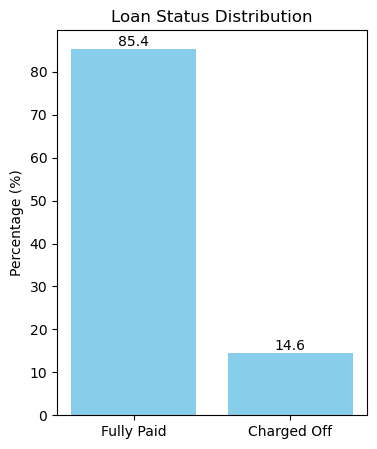

In [93]:
# Distribution of loan status
ls = loan_df['loan_status'].value_counts(normalize=True)*100

plt.figure(figsize=(4, 5))
bars = plt.bar(ls .index, ls .values,color='skyblue')

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,1), ha='center', va='bottom')

plt.ylabel('Percentage (%)')
plt.title('Loan Status Distribution')
plt.show()

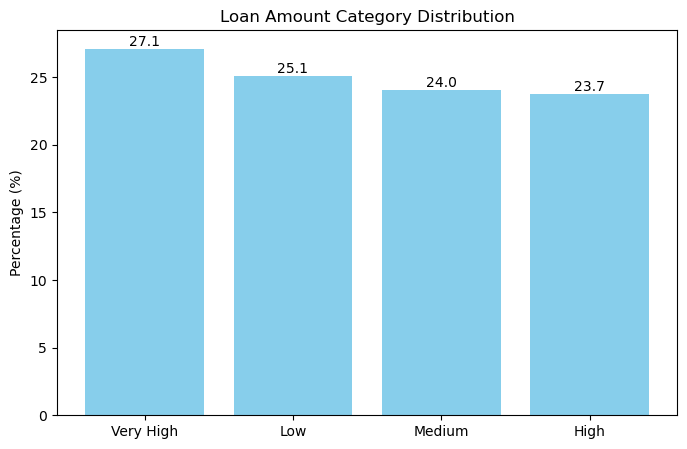

In [94]:
# Distribution of loan amount
lamt = loan_df['loan_amnt_category'].value_counts(normalize=True)*100

plt.figure(figsize=(8, 5))
bars = plt.bar(lamt .index, lamt .values,color='skyblue')

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,1), ha='center', va='bottom')

plt.ylabel('Percentage (%)')
plt.title('Loan Amount Category Distribution')
plt.show()

These percentages indicate a relatively even distribution across different loan amount categories, with no single category overwhelmingly preferred by borrowers. This could suggest a diverse range of financial needs and borrowing capacities among the applicants.

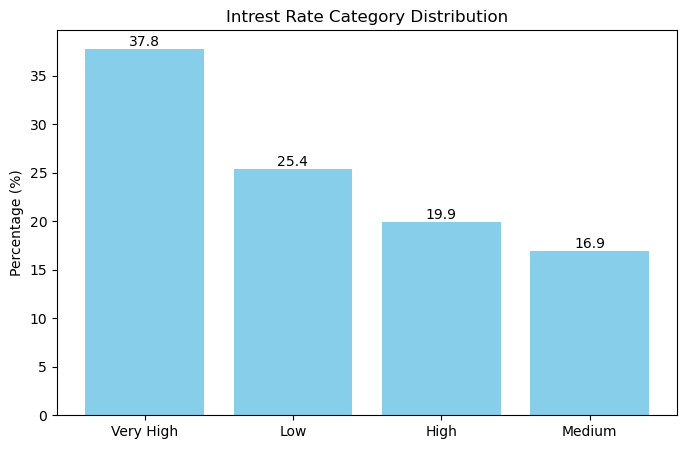

In [95]:
#Intrest rate distribution
irt = loan_df['rate_category'].value_counts(normalize=True)*100

plt.figure(figsize=(8, 5))
bars = plt.bar(irt .index, irt .values,color='skyblue')

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,1), ha='center', va='bottom')

plt.ylabel('Percentage (%)')
plt.title('Intrest Rate Category Distribution')
plt.show()

Interest Rate Distribution:
- The “Very High” interest rate category has the largest share at approximately 37.8%.
- The “Low” category follows with around 25.4%.
- “High” and “Medium” categories have smaller shares at about 19.9% and 16.9%, respectively.

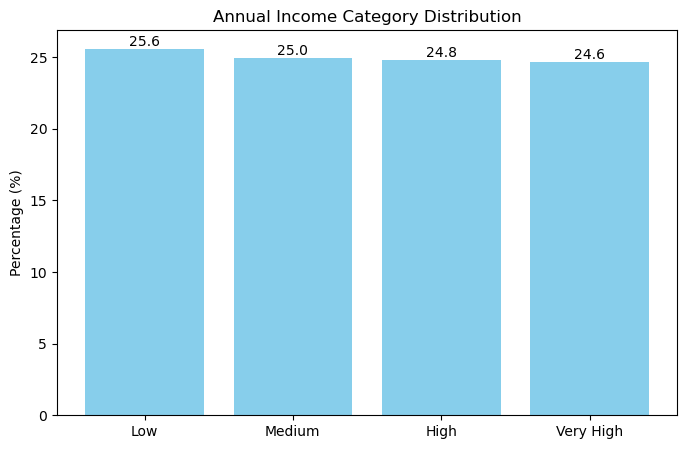

In [96]:
# Annual income distibution
aic = loan_df['annual_inc_category'].value_counts(normalize=True)*100

plt.figure(figsize=(8, 5))
bars = plt.bar(aic .index, aic .values,color='skyblue')

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,1), ha='center', va='bottom')

plt.ylabel('Percentage (%)')
plt.title('Annual Income Category Distribution')
plt.show()

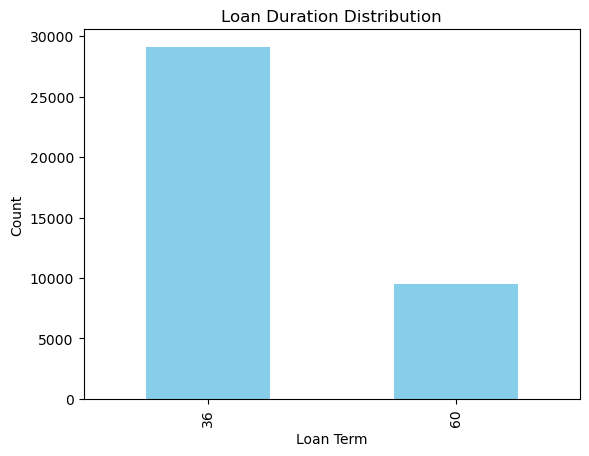

In [97]:
# Distribution of loan duration
loan_df['term'].value_counts().plot(kind='bar',color='skyblue')
plt.title('Loan Duration Distribution')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()

Loan Duration:
- The graph shows a single category “<=60 months” with a high count just above 30,000.
- This indicates that the majority of loans have a term of 60 months or less.

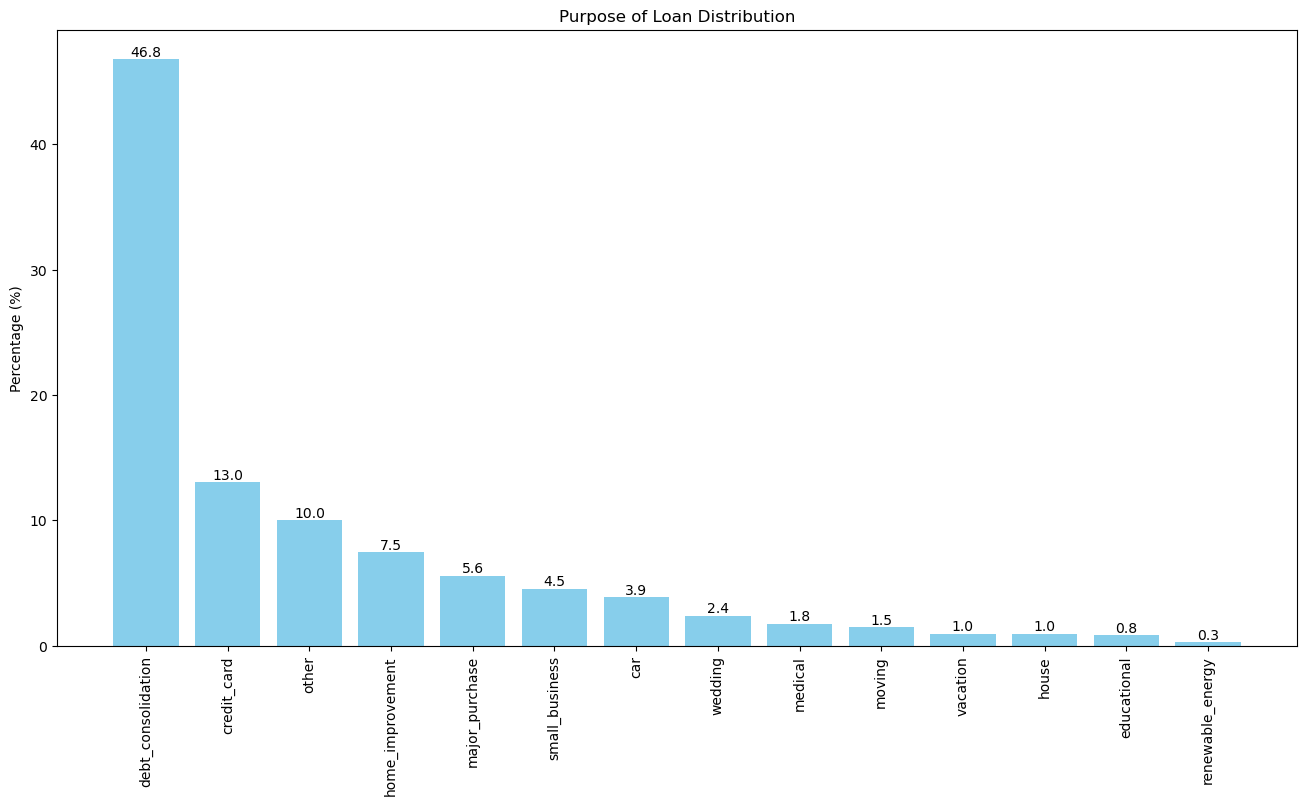

In [98]:
# Loan purpose distribution
lp = loan_df['purpose'].value_counts(normalize=True)*100

plt.figure(figsize=(16, 8))
bars = plt.bar(lp .index, lp.values,color='skyblue')

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,1), ha='center', va='bottom')

plt.ylabel('Percentage (%)')
plt.title('Purpose of Loan Distribution')
plt.xticks(rotation=90)
plt.show()

These values highlight debt consolidation as the primary reason for seeking loans, with other purposes like credit card refinancing and home improvements also being significant. |

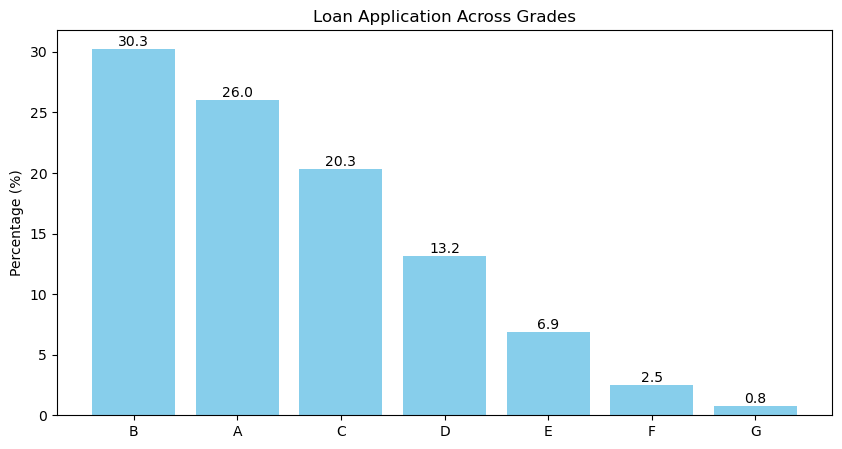

In [99]:
# Loan applications spread across the grades
gr = loan_df['grade'].value_counts(normalize=True)*100

plt.figure(figsize=(10, 5))
bars = plt.bar(gr .index, gr.values,color='skyblue')

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,1), ha='center', va='bottom')

plt.ylabel('Percentage (%)')
plt.title('Loan Application Across Grades')
plt.show()

This distribution suggests that a majority of loan applicants are within the higher credit grades (A and B), which could indicate a perception of better creditworthiness or a higher likelihood of loan approval for these grades. Grades with lower creditworthiness (E, F, G) see fewer applications, possibly due to a lower chance of approval or less favorable loan terms.

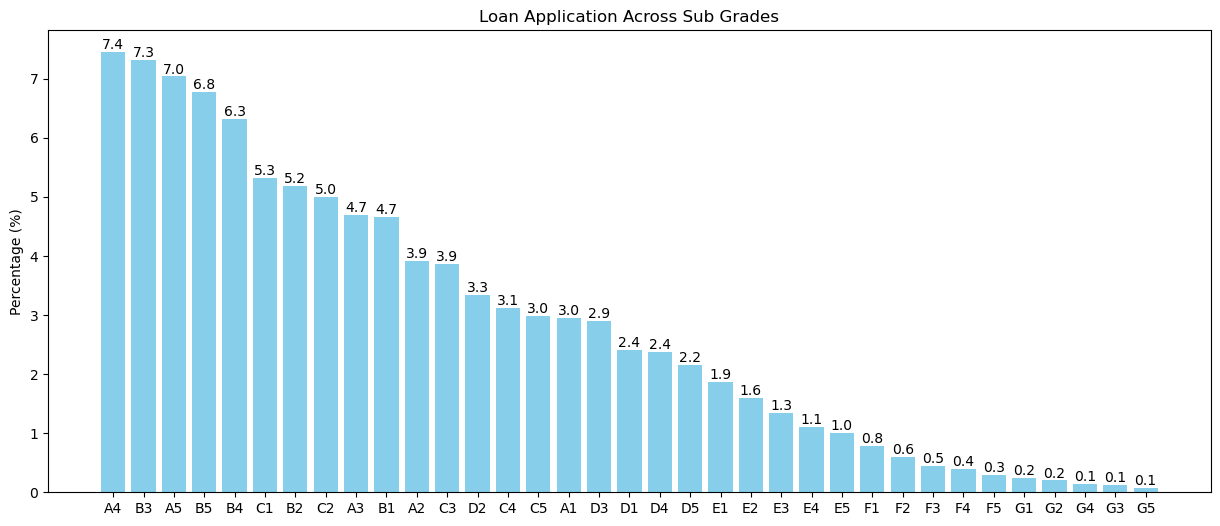

In [100]:
# Loan applications spread across the sub grades
sgr = loan_df['sub_grade'].value_counts(normalize=True)*100

plt.figure(figsize=(15, 6))
bars = plt.bar(sgr .index, sgr.values,color='skyblue')

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,1), ha='center', va='bottom')

plt.ylabel('Percentage (%)')
plt.title('Loan Application Across Sub Grades')
plt.show()

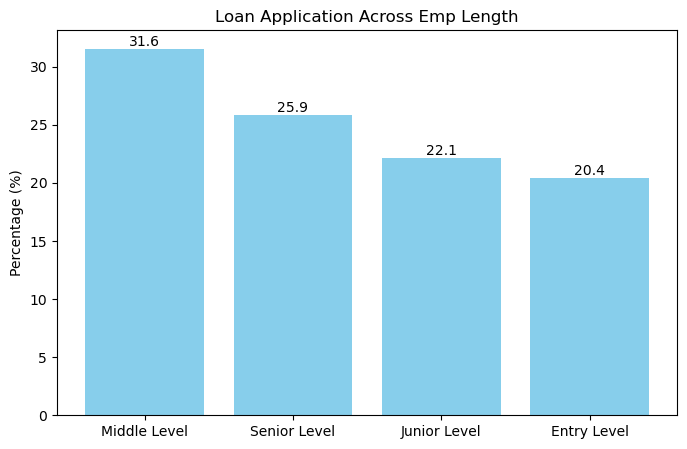

In [101]:
# Loan distribution across employement length
exp = loan_df['emp_len_category'].value_counts(normalize=True)*100

plt.figure(figsize=(8, 5))
bars = plt.bar(exp .index, exp.values,color='skyblue')

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,1), ha='center', va='bottom')

plt.ylabel('Percentage (%)')
plt.title('Loan Application Across Emp Length')
plt.show()

- Debt to income ratio

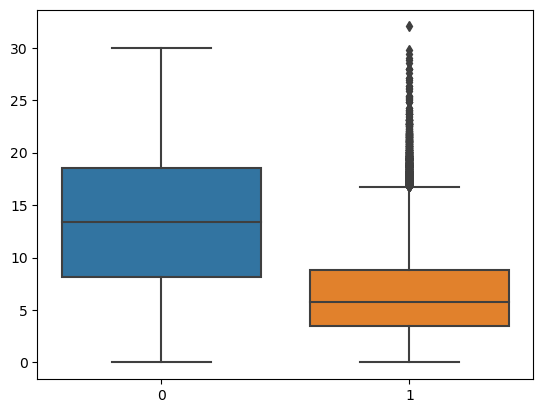

In [102]:
sns.boxplot(data=[loan_df.dti,loan_df.loan_to_income_ratio])
plt.show()

## Bivariate Analysis
- Correlation across loan_amount,
- funded_amount, funded_amount_inv, term,
- int_rate, emp_length, annual_inc, dti and loan_inc_ratio
- LoanDurationVs Loan Status D
- Verification Status Vs Loan Status 
- HomeOwnership Vs Loan Status D
- Loan Amount Vs Loan Status D
- Interest Rate Vs Loan Status D
- Annual Income Vs Loan Status D
- Grade Vs Loan Status D
- Purpose Vs Loan Status  D
- Debt To Income Vs Loan Status D
- Loan To Income Vs Loan Status D

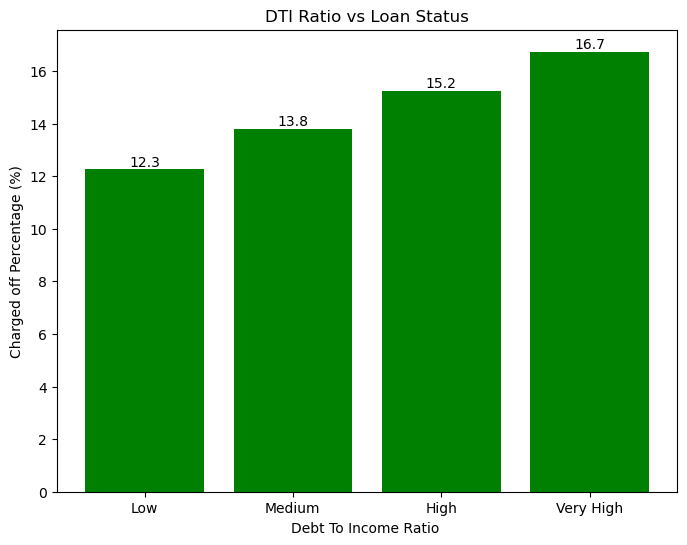

In [103]:
# Debt To Income Vs Loan Status
dl = loan_df.groupby('dti_category')['status_flag'].mean()*100

plt.figure(figsize=(8, 6))
bars = plt.bar(dl .index, dl .values,color='g')

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,1), ha='center', va='bottom')

plt.xlabel('Debt To Income Ratio ')
plt.ylabel('Charged off Percentage (%)')
plt.title('DTI Ratio vs Loan Status')

plt.show()

In [104]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose',
       'loan_status', 'dti', 'issue_year', 'issue_month',
       'loan_to_income_ratio', 'rate_category', 'loan_amnt_category',
       'dti_category', 'annual_inc_category', 'lti_category',
       'emp_len_category', 'status_flag'],
      dtype='object')

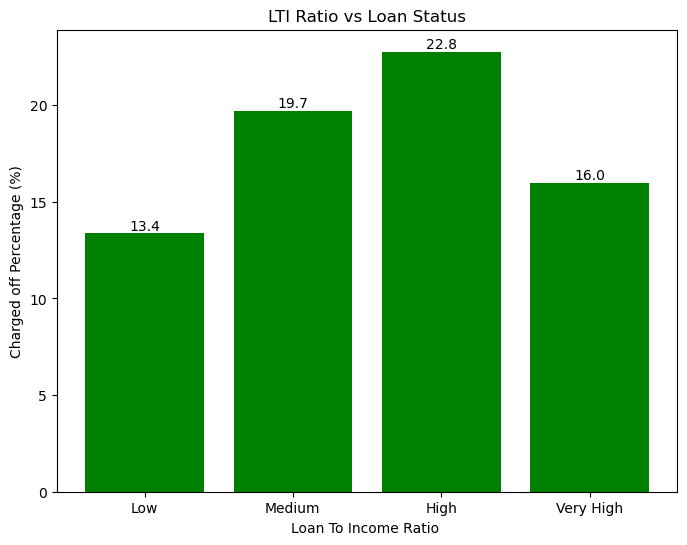

In [105]:
# Loan To Income Vs Loan Status 
lti = loan_df.groupby('lti_category')['status_flag'].mean()*100

plt.figure(figsize=(8, 6))
bars = plt.bar(lti .index, lti .values,color='g')

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,1), ha='center', va='bottom')

plt.xlabel('Loan To Income Ratio ')
plt.ylabel('Charged off Percentage (%)')
plt.title('LTI Ratio vs Loan Status')

plt.show()

The bar chart “LTI Ratio vs Loan Status” reveals the relationship between loan-to-income (LTI) ratios and loan charge-off percentages:
- Low LTI Ratio: 13.4% of loans are charged off.
- Medium LTI Ratio: 19.7% of loans are charged off.
- High LTI Ratio: 22.8% of loans are charged off.
- Very High LTI Ratio: 16.0% of loans are charged off.

The data suggests that loans with high and very high LTI ratios tend to have higher charge-off rates, indicating a potential risk factor for lenders. 

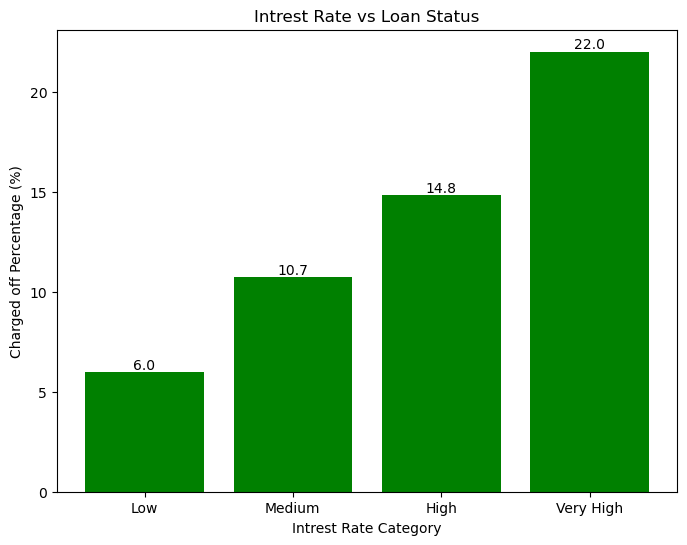

In [106]:
# Intrest Rate Vs Loan Status 
irm = loan_df.groupby('rate_category')['status_flag'].mean()*100

# Create the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(irm .index, irm .values,color='g')

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,1), ha='center', va='bottom')

plt.xlabel('Intrest Rate Category')
plt.ylabel('Charged off Percentage (%)')
plt.title('Intrest Rate vs Loan Status')

plt.show()

Here are the key insights:

Risk and Rate Correlation: As interest rates increase from Low to Very High, the percentage of charged-off loans also rises, indicating a potential link between higher rates and loan defaults.

Interest Rate Categories:
- Low: 6.0% charged-off loans
- Medium: 10.7% charged-off loans
- High: 14.8% charged-off loans
- Very High: 22.0% charged-off loans

This pattern suggests that loans with higher interest rates carry a higher risk of not being repaid, which is an important consideration for credit risk management.

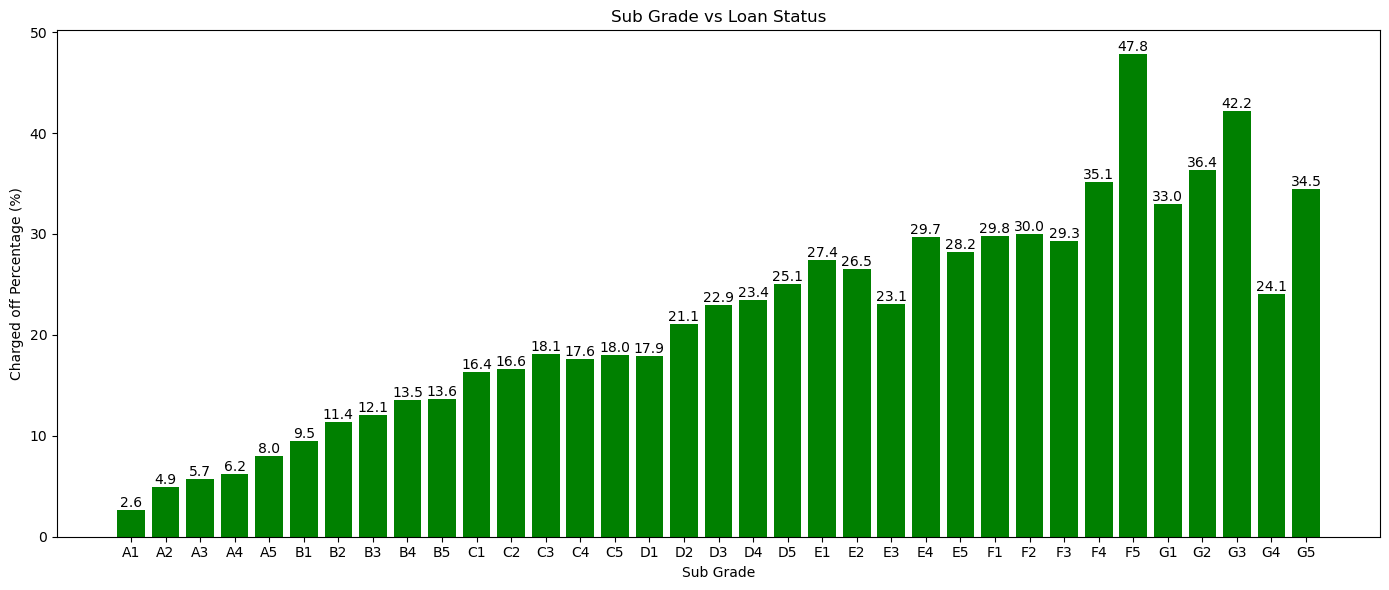

In [107]:
# Sub Grade Vs Loan Status 
sub_grade_means = loan_df.groupby('sub_grade')['status_flag'].mean()*100

plt.figure(figsize=(14, 6))
bars = plt.bar(sub_grade_means.index, sub_grade_means.values,color='g')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,1), ha='center', va='bottom')

plt.xlabel('Sub Grade')
plt.ylabel('Charged off Percentage (%)')
plt.title('Sub Grade vs Loan Status')

# Show the graph
plt.tight_layout()
plt.show()

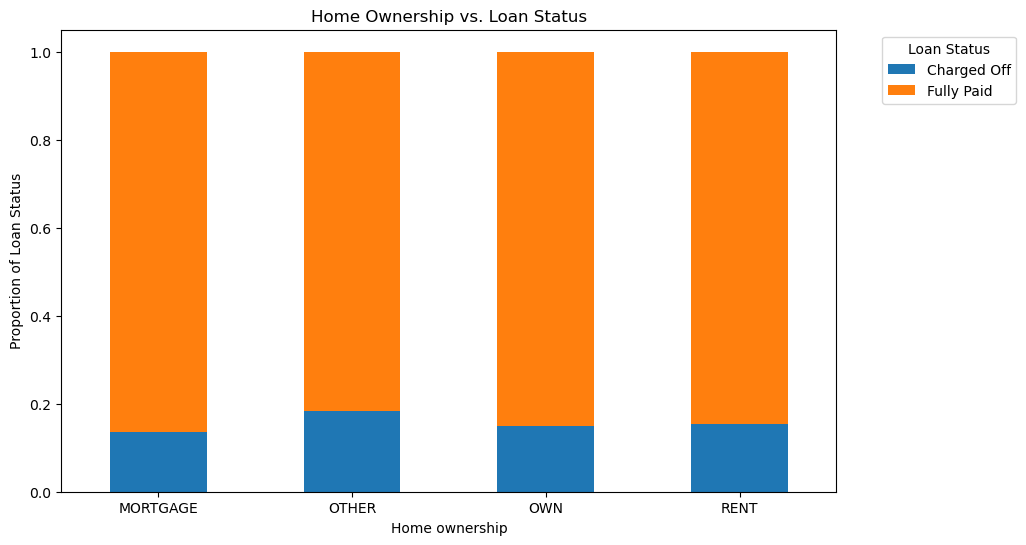

In [108]:
# Home Ownership vs. Loan Status
annual = pd.crosstab(loan_df[~(loan_df['home_ownership']=='NONE')]['home_ownership'], loan_df['loan_status'], normalize='index')
annual.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Home Ownership vs. Loan Status')
plt.xlabel('Home ownership')
plt.ylabel('Proportion of Loan Status')
plt.legend(title='Loan Status',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

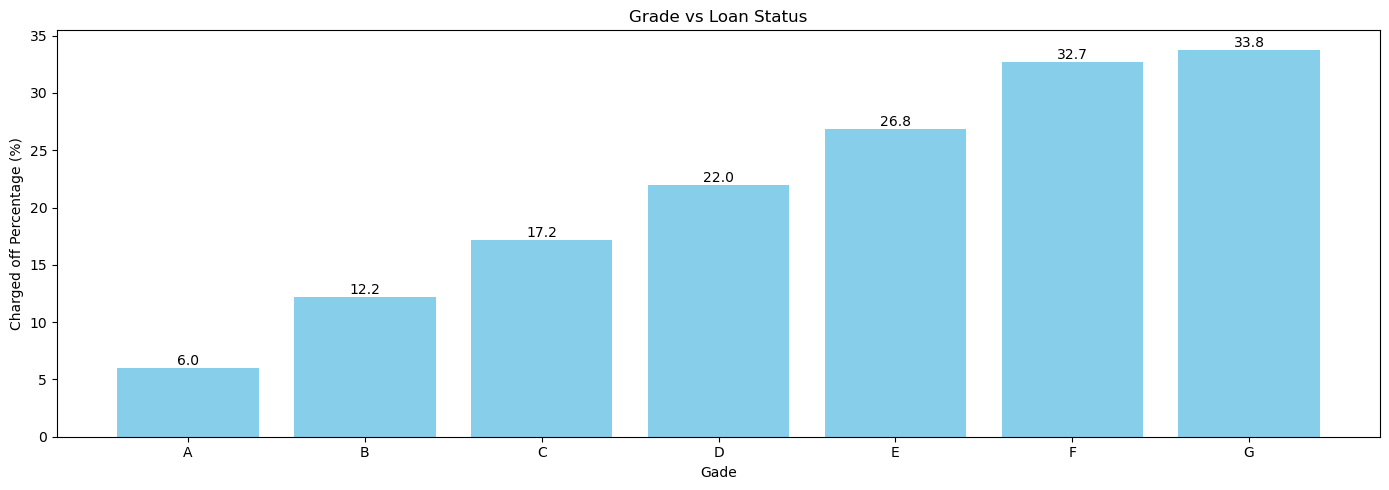

In [109]:
# Grade vs. Loan Status
gm = loan_df.groupby('grade')['status_flag'].mean()*100

plt.figure(figsize=(14, 5))
bars = plt.bar(gm.index, gm.values,color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,1), ha='center', va='bottom')

plt.xlabel('Gade')
plt.ylabel('Charged off Percentage (%)')
plt.title('Grade vs Loan Status')
plt.tight_layout()
plt.show()


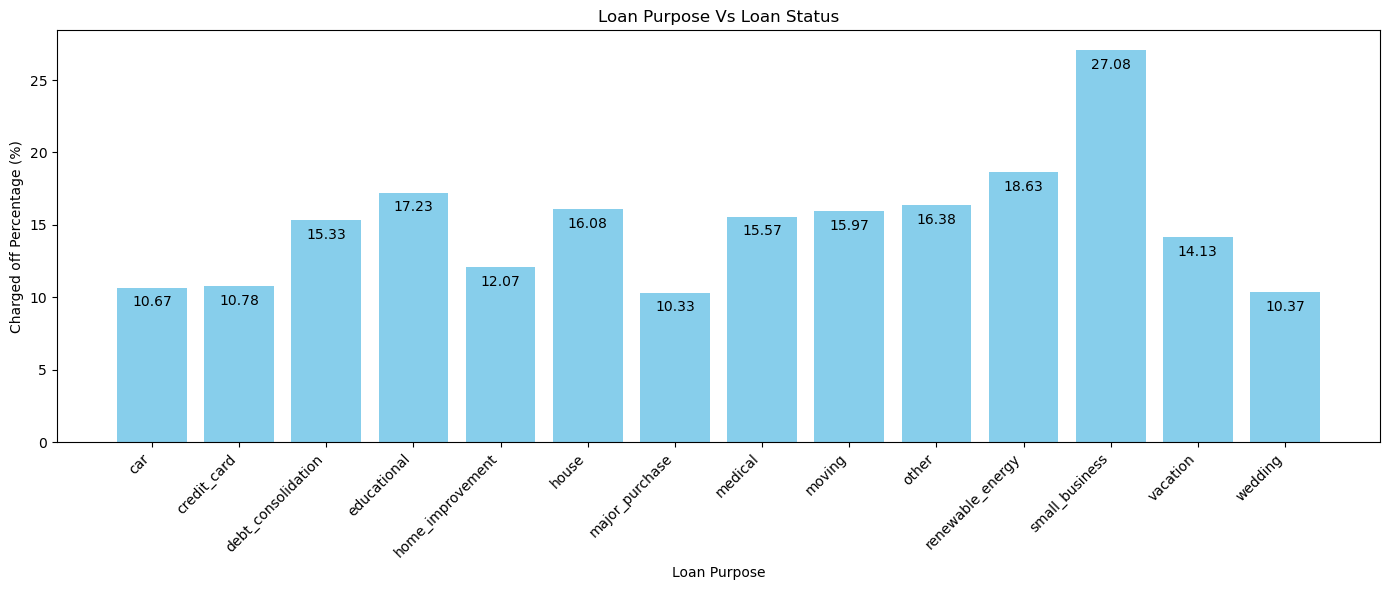

In [110]:
# Loan Purpose Vs Loan Status
pm =loan_df.groupby('purpose')['status_flag'].mean()*100
plt.figure(figsize=(14, 6))
bars = plt.bar(pm.index, pm.values,color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval -1.5, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Loan Purpose')
plt.ylabel('Charged off Percentage (%)')
plt.title('Loan Purpose Vs Loan Status')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

The bar graph shows the charge-off rates for various loan purposes:

- Small Business: Highest risk with a 27.08% charge-off rate.
- Renewable Energy: Next highest risk at 18.63%.
- Educational: Charge-off rate of 17.23%.

Loans for small businesses and Renewable Energy  and Educational  loans carry higher risks.

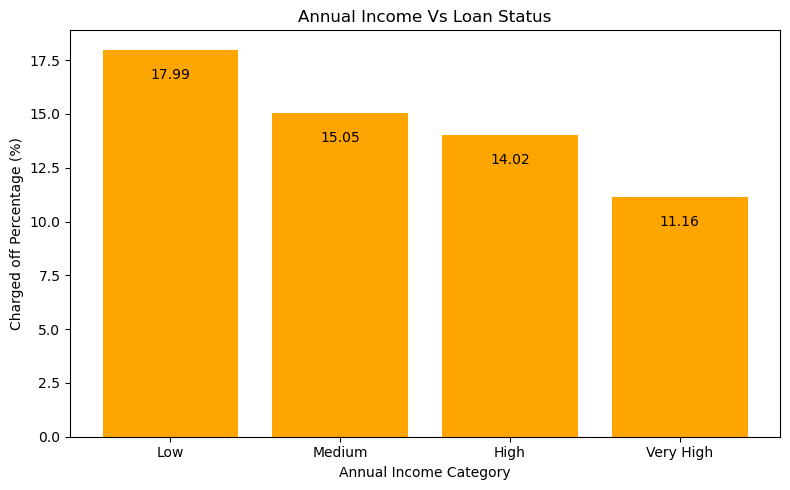

In [111]:
# Annual Income Vs Loan Status
am=loan_df.groupby('annual_inc_category')['status_flag'].mean()*100
plt.figure(figsize=(8, 5))
bars = plt.bar(am.index, am.values ,color='orange')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval -1.5, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Annual Income Category')
plt.ylabel('Charged off Percentage (%)')
plt.title('Annual Income Vs Loan Status')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the graph
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

Income Correlation with Loan Charge-Offs: The graph suggests a trend where lower annual income categories have higher charged-off percentages. Specifically, the “Low” income category has the highest charged-off percentage at approximately 17.99%,

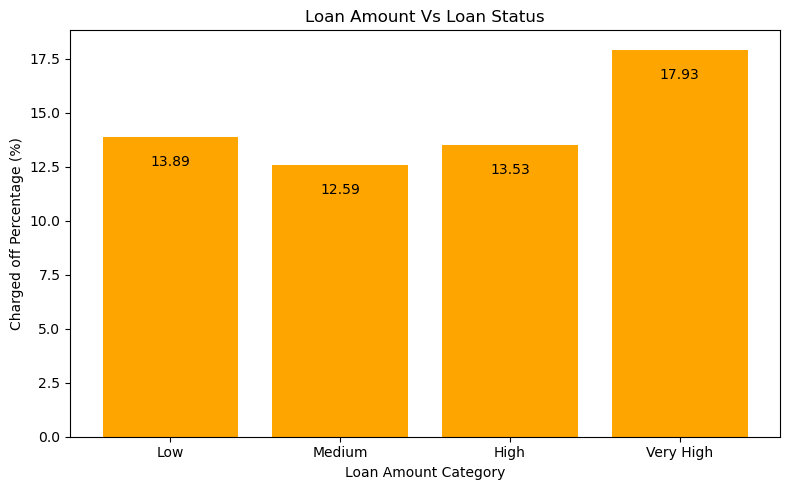

In [112]:
# Loan Amount Vs Loan Status
lm=loan_df.groupby('loan_amnt_category')['status_flag'].mean()*100
plt.figure(figsize=(8, 5))
bars = plt.bar(lm.index, lm.values ,color='orange')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval -1.5, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Loan Amount Category')
plt.ylabel('Charged off Percentage (%)')
plt.title('Loan Amount Vs Loan Status')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the graph
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

Higher Risk with Larger Loans: The graph suggests that loans categorized as “Very High” have the highest charged-off percentage at 17.93%, indicating a greater risk of default compared to other categories. In contrast, “Medium” loans have the lowest charged-off percentage at 12.59%. This implies that as the loan amount increases, so does the likelihood of charge-offs.

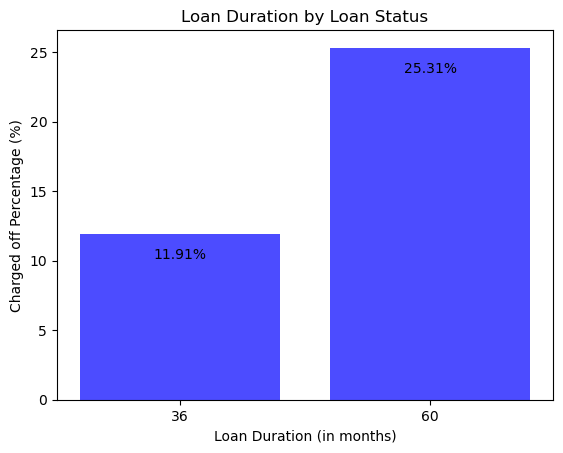

In [113]:
# Loan Duration Vs Loan Status
terms = ['36', '60']
mean_status_flags = [0.119090, 0.253138]  # Original values
mean_status_flags_percentage = [val * 100 for val in mean_status_flags]  # Converted to percentages

# Creating abar graph
plt.bar(terms, mean_status_flags_percentage, color='blue', alpha=0.7)

for i, value in enumerate(mean_status_flags_percentage):
    plt.text(i, value-2, f'{value:.2f}%', ha='center', va='bottom')

plt.title('Loan Duration by Loan Status')
plt.xlabel('Loan Duration (in months)')
plt.ylabel('Charged off Percentage (%)')
plt.show()
#Generated the bar from this

The graph indicates that loans with a term of 60 months have a higher charged-off percentage compared to those with a term of 36 months. This suggests that longer-term loans may carry a higher risk of charge-offs.

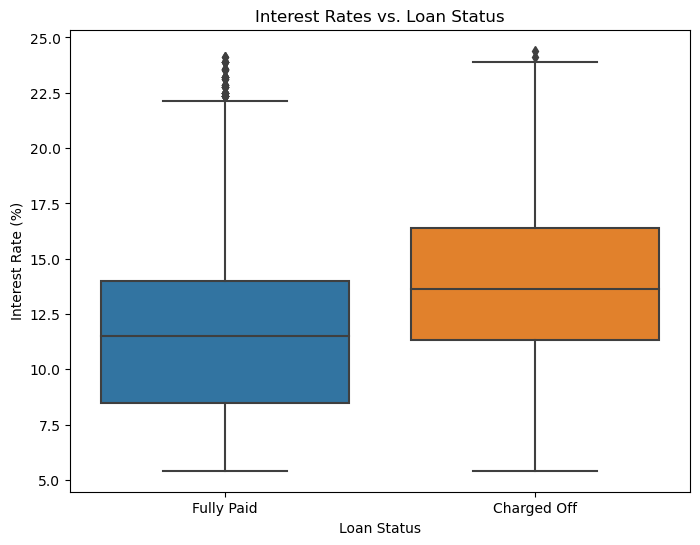

In [114]:
# Interest Rates vs. Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_df)
plt.title('Interest Rates vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=0)
plt.show()

# Multivariate Analysis

In [115]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,issue_year,issue_month,loan_to_income_ratio,rate_category,loan_amnt_category,dti_category,annual_inc_category,lti_category,emp_len_category,status_flag
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,...,2011,12,8.14,Medium,Low,Very High,Low,Low,Senior Level,0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,...,2011,12,2.39,Very High,Low,Low,Low,Low,Entry Level,1
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,...,2011,12,8.26,Very High,Low,Medium,Low,Low,Senior Level,0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,...,2011,12,8.28,Very High,High,Very High,Medium,Low,Senior Level,0
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,...,2011,12,5.22,Low,Low,Medium,Low,Low,Junior Level,0


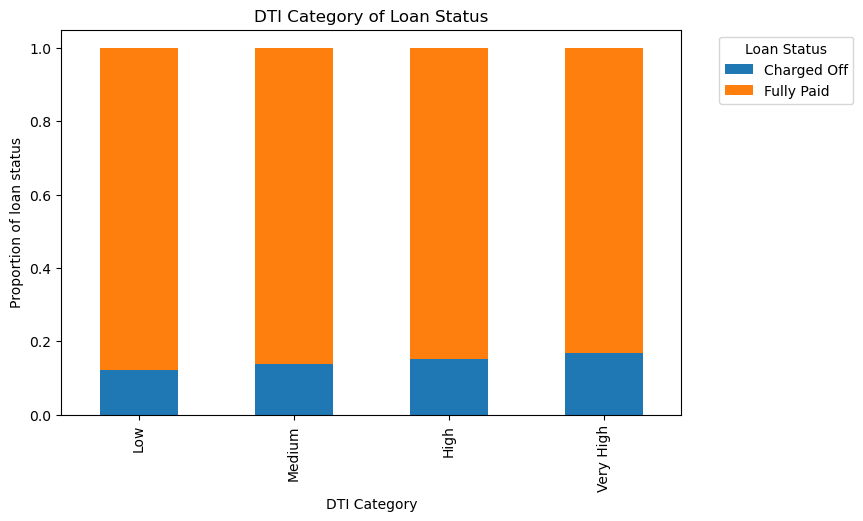

In [116]:
# Stacked bar chart for Grade vs. Loan Status
grade_stats = pd.crosstab(loan_df['dti_category'], loan_df['loan_status'], normalize='index')
grade_stats.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('DTI Category of Loan Status')
plt.xlabel('DTI Category')
plt.ylabel('Proportion of loan status')
plt.legend(title='Loan Status',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The box plot comparing interest rates between ‘Fully Paid’ and ‘Charged Off’ loans reveals:

Higher Rates for Defaults:
- Charged off loans tend to have higher interest rates.
- This suggests a correlation between higher rates and loan defaults.

Rate Distribution:
- The spread of interest rates is wider for charged off loans.
- Fully paid loans generally cluster around lower interest rates.

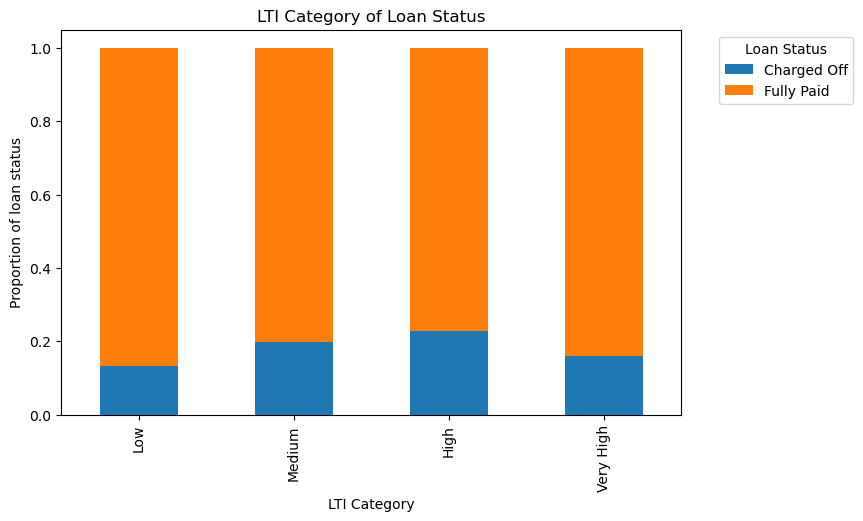

In [117]:
# Stacked bar chart for Grade vs. Loan Status
lti_stats = pd.crosstab(loan_df['lti_category'], loan_df['loan_status'], normalize='index')
lti_stats.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('LTI Category of Loan Status')
plt.xlabel('LTI Category')
plt.ylabel('Proportion of loan status')
plt.legend(title='Loan Status',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [118]:
# Statistical summary for DTI ratio by loan status
dti_stats = loan_df.groupby('loan_status')['dti'].describe()
print("\nSummary statistics for DTI Ratio vs Loan Status:")
print(dti_stats)


Summary statistics for DTI Ratio vs Loan Status:
               count       mean       std  min   25%    50%    75%    max
loan_status                                                              
Charged Off   5627.0  14.000624  6.585577  0.0  9.05  14.29  19.29  29.85
Fully Paid   32950.0  13.148421  6.680041  0.0  7.98  13.20  18.39  29.99


In [119]:
x=loan_df.pivot_table(values='loan_amnt',index='loan_status',columns='annual_inc_category')

In [120]:
loan_df.status_flag.value_counts()/len(loan_df) *100

0    85.413588
1    14.586412
Name: status_flag, dtype: float64

In [121]:
x

annual_inc_category,Low,Medium,High,Very High
loan_status,,,,
Charged Off,7602.492958,11327.915804,14395.081967,17798.868992
Fully Paid,6865.218063,9628.656598,11806.274295,14982.819344


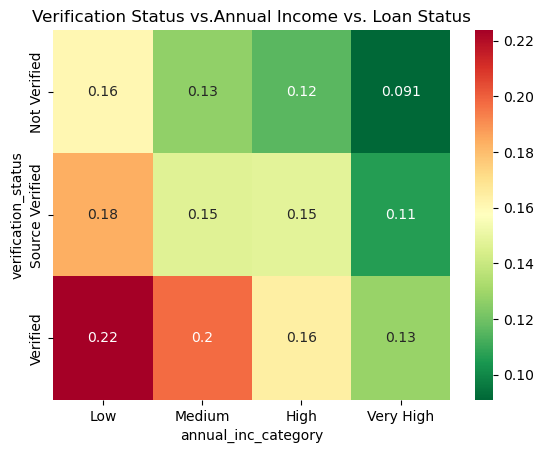

In [122]:
# Verification Status vs.Annual Income vs. Loan Status
x=loan_df.pivot_table(values='status_flag',index='verification_status',columns='annual_inc_category',aggfunc='mean')
sns.heatmap(x,annot=True,cmap='RdYlGn_r')
plt.title('Verification Status vs.Annual Income vs. Loan Status')
plt.show()

The heatmap analysis indicates the following insights, where red represents a higher probability of bad loans and green represents a higher probability of good loans:

Verification Status:
- Not Verified: Higher proportion of bad loans across all income levels.
- Source Verified: Moderate risk with a mix of good and bad loans.
- Verified: Lower proportion of bad loans, especially in higher income categories.

Annual Income:
- Low: Higher risk of bad loans regardless of verification status.
- Medium to Very High: As income increases, the likelihood of good loans increases, particularly when verified.

This data suggests that both the level of income verification and the annual income category are important factors in predicting loan status. Verified high-income borrowers tend to have better loan outcomes.

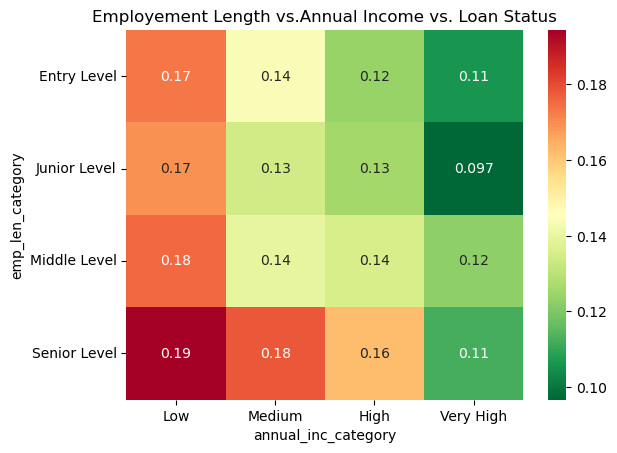

In [123]:
# Employement Length vs.Annual Income vs. Loan Status
y=loan_df.pivot_table(values='status_flag',index='emp_len_category',columns='annual_inc_category',aggfunc='mean')
sns.heatmap(y,annot=True,cmap='RdYlGn_r')
plt.title('Employement Length vs.Annual Income vs. Loan Status')
plt.yticks(rotation=0)
plt.show()

The heatmap analysis indicates the following insights, where darker colors represent higher percentages of charged-off loans:

Entry Level:
- Low Income: Higher charge-off percentage (0.17).
- Very High Income: Lower charge-off percentage (0.11).

Junior Level:
-  Low Income: Similar charge-off percentage (0.17) as Entry Level.
- Very High Income: Significantly lower charge-off percentage (0.097).

Middle Level:
- Low Income: Highest charge-off percentage (0.18) across all levels.
- Very High Income: Lower charge-off percentage (0.12).
Senior Level:
- Low Income: Highest charge-off percentage (0.19) in this level.
- Very High Income: Lower charge-off percentage (0.11).

Overall, the trend suggests that individuals with higher annual incomes tend to have lower charge-off percentages across all employment levels, indicating a potential correlation between income level and loan repayment reliability. Additionally, Senior Level employees with Very High annual incomes have the lowest charge-off percentage, suggesting that experience and higher income may contribute to financial stability and loan repayment success.

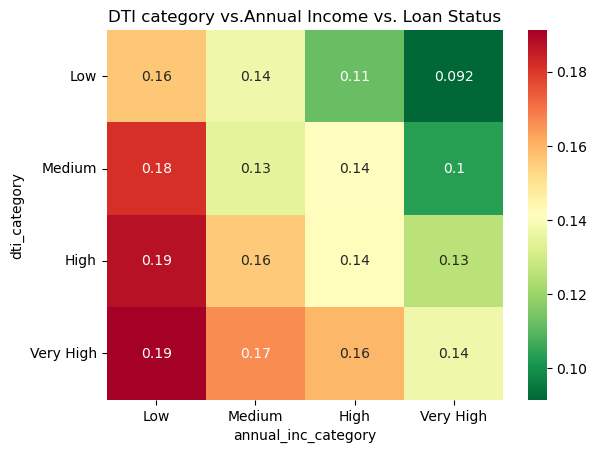

In [76]:
# DTI category vs.Annual Income vs. Loan Status
c=loan_df.pivot_table(values='status_flag',index='dti_category',columns='annual_inc_category',aggfunc='mean')
sns.heatmap(c,annot=True,cmap='RdYlGn_r')
plt.title('DTI category vs.Annual Income vs. Loan Status')
plt.yticks(rotation=0)
plt.show()

The data suggests that individuals with very high incomes have the lowest charge-off percentages at low DTI levels, indicating better financial stability. However, as DTI increases, even those with very high incomes show an increased risk of loan charge-offs. 

In [77]:
loan_df.groupby(['purpose'])['status_flag'].mean().sort_values(ascending=False).iloc[:5]*100

purpose
small_business      27.080958
renewable_energy    18.627451
educational         17.230769
other               16.377749
house               16.076294
Name: status_flag, dtype: float64

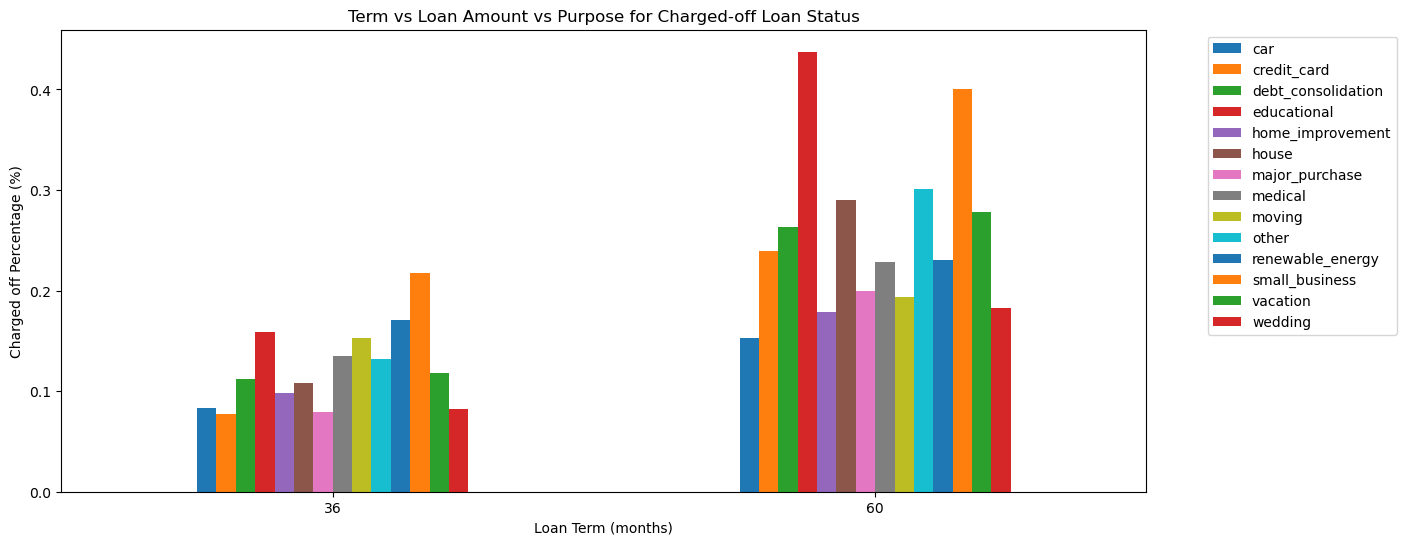

In [78]:
# Term vs loan Amount vs Purpose for chargedoff loan status
grouped = loan_df.groupby(['term', 'purpose'])['status_flag'].mean().reset_index()

pivot_table = grouped.pivot(index='term', columns='purpose', values='status_flag')

pivot_table.plot(kind='bar', figsize=(14, 6))

plt.title('Term vs Loan Amount vs Purpose for Charged-off Loan Status')
plt.xlabel('Loan Term (months)')
plt.ylabel('Charged off Percentage (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

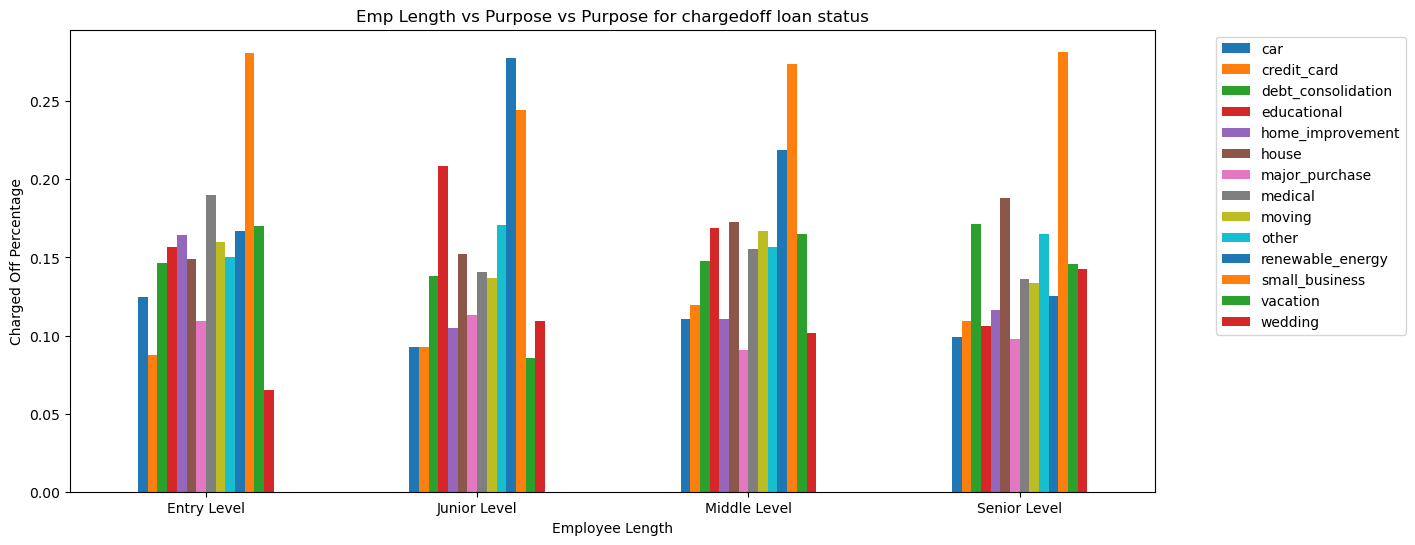

In [79]:
# Emp Length vs Purpose vs Purpose for charged off loan status
grouped = loan_df.groupby(['emp_len_category', 'purpose'])['status_flag'].mean().reset_index()

pivot_table = grouped.pivot(index='emp_len_category', columns='purpose', values='status_flag')

pivot_table.plot(kind='bar', figsize=(14, 6))

plt.title('Emp Length vs Purpose vs Purpose for chargedoff loan status')
plt.xlabel('Employee Length')
plt.ylabel('Charged Off Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

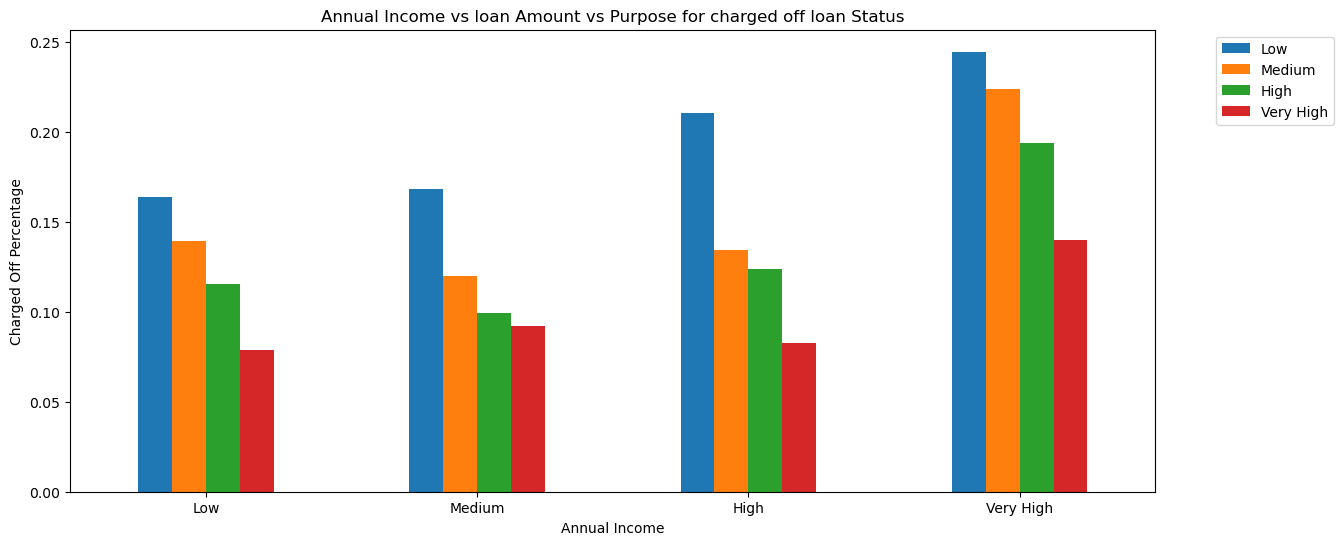

In [80]:
# Annual Income vs loan Amount vs Purpose for charged off loan Status
dd = loan_df.groupby(['loan_amnt_category', 'annual_inc_category'])['status_flag'].mean().reset_index()

# Create a pivot table
pivot_table = dd.pivot(index='loan_amnt_category', columns='annual_inc_category', values='status_flag')

# Plot the bar chart
pivot_table.plot(kind='bar', figsize=(14, 6))

plt.title('Annual Income vs loan Amount vs Purpose for charged off loan Status')
plt.xlabel('Annual Income')
plt.ylabel('Charged Off Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

CONCLUSION

Based on the analysis, the driving factors (or strong indicators) behind loan defaults can be summarized as follows:

Higher Loan Amounts:
- There is a correlation between higher loan amounts and an increased risk of default.
- Charged-off loans tend to have higher average loan amounts compared to fully paid loans.

Higher Interest Rates:
- Loans with higher interest rates are more likely to end up as charged off.
- Interest rates play a significant role in determining the risk of default.

Lower Credit Grades:
- Lower credit grades (e.g., grades D, E, F, G) are associated with a higher proportion of charged-off loans.
- Applicants with lower credit grades pose a higher risk of default.

Higher Debt-to-Income (DTI) Ratios:
- Loans with higher DTI ratios are more likely to default.
- Charged-off loans tend to have higher DTI ratios compared to fully paid loans.

Employment Length:
- Although not explicitly mentioned in the summary, employment length can also be a driving factor.
- Applicants with shorter employment histories or unstable employment records might be at a higher risk of default.

Annual Income:
- Although not strongly highlighted in the provided insights, annual income often correlates with the ability to repay loans.
- Higher income levels generally indicate better repayment capability.